In [ ]:
import pickle

with open("msvc/temp.pickle", "rb") as f:
    temp = pickle.load(f)

In [ ]:
import numpy as np



np.array(temp).shape

(1080, 1920, 4)

In [13]:
min(temp)

0

In [ ]:
1080 * 1920

2073600

In [3]:
np.array(temp).reshape(1080, 1920, -1).shape

(1080, 1920, 4)

In [11]:
np.array(temp).reshape(1080, 1920, 4)[:, :, :3].shape

(1080, 1920, 3)

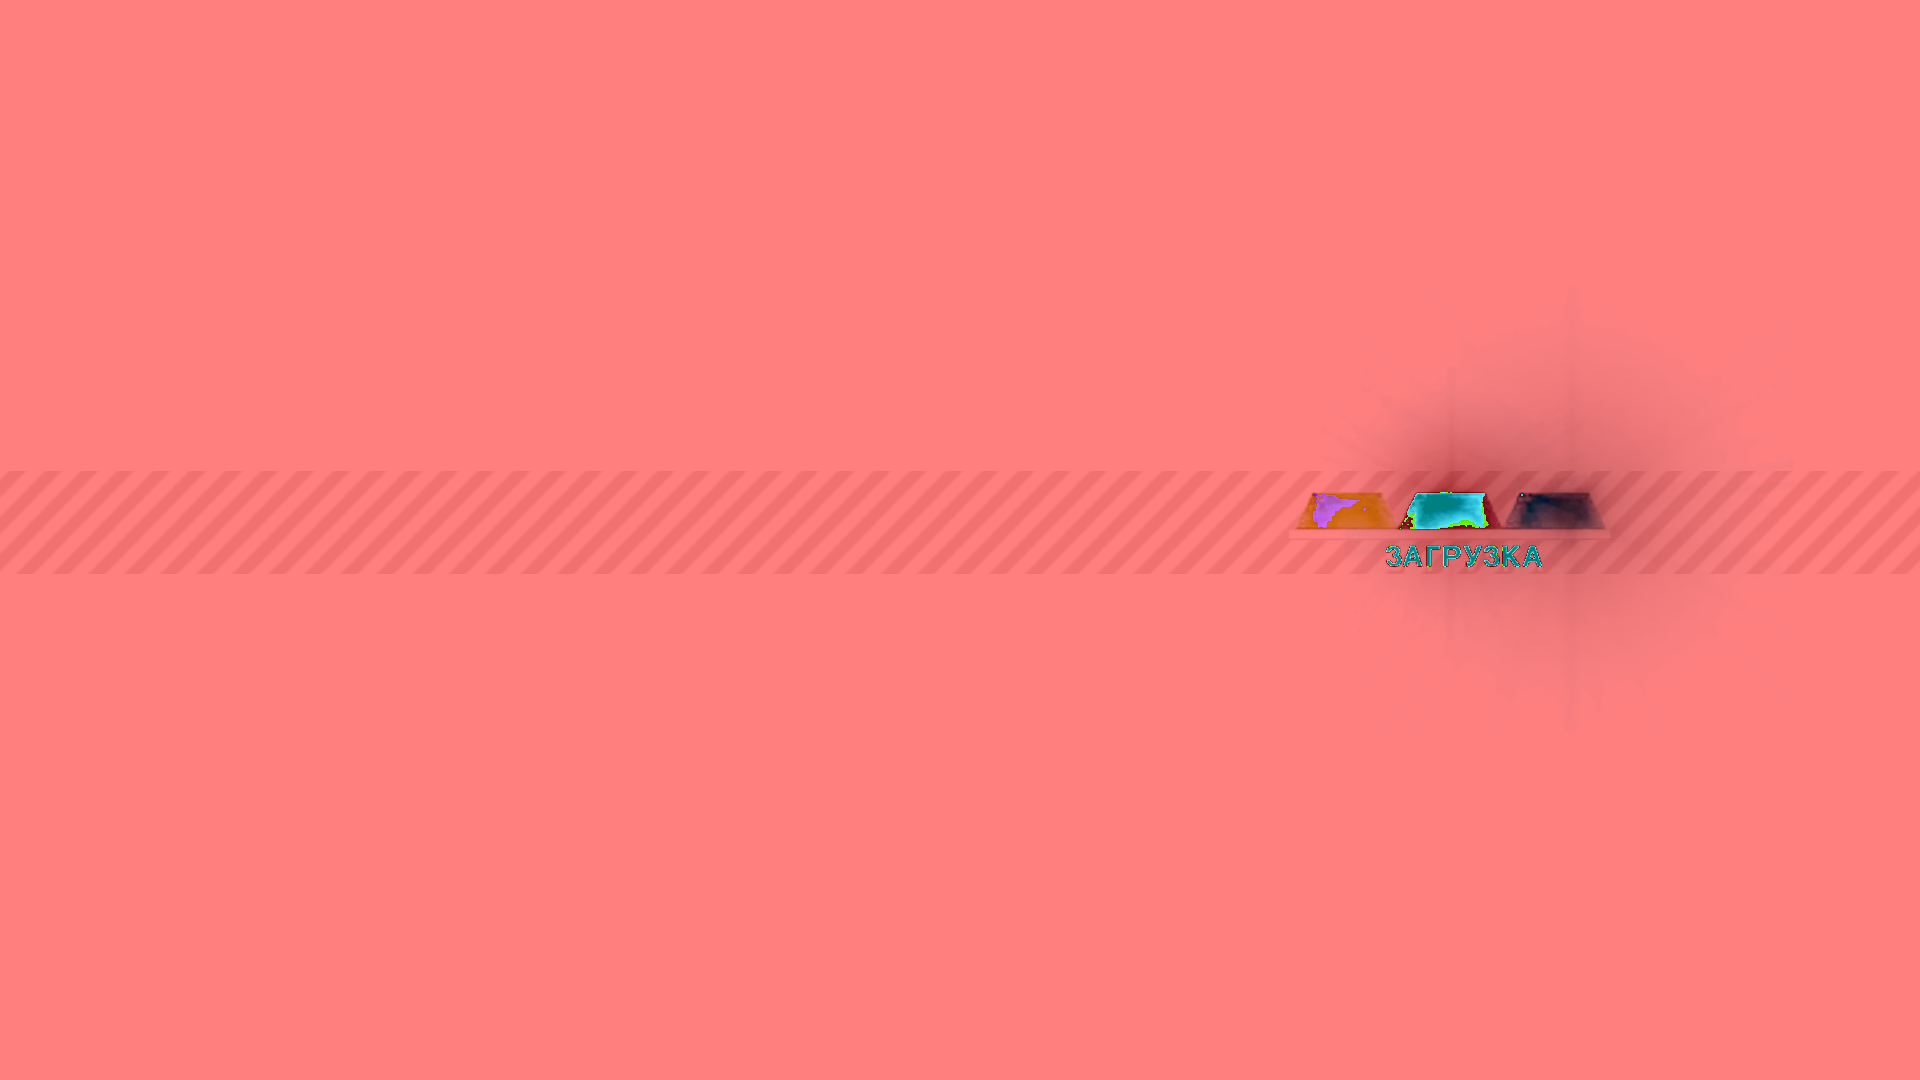

In [ ]:
from PIL import Image

image_array = np.array(temp, dtype=np.uint8).reshape(1080, 1920, 4)
image_array[:, :, 3:] = 255
image_array[:, :, :2] = image_array[:, :, :2] - 128
Image.fromarray(image_array[:, :, [2, 1, 0, 3]], "RGBA")

C:\Users\dimweb\AppData\Local\Temp\ipykernel_32392\1435984950.py:7: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 666 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np_array = np.array(inverted_data, dtype=np.uint8)


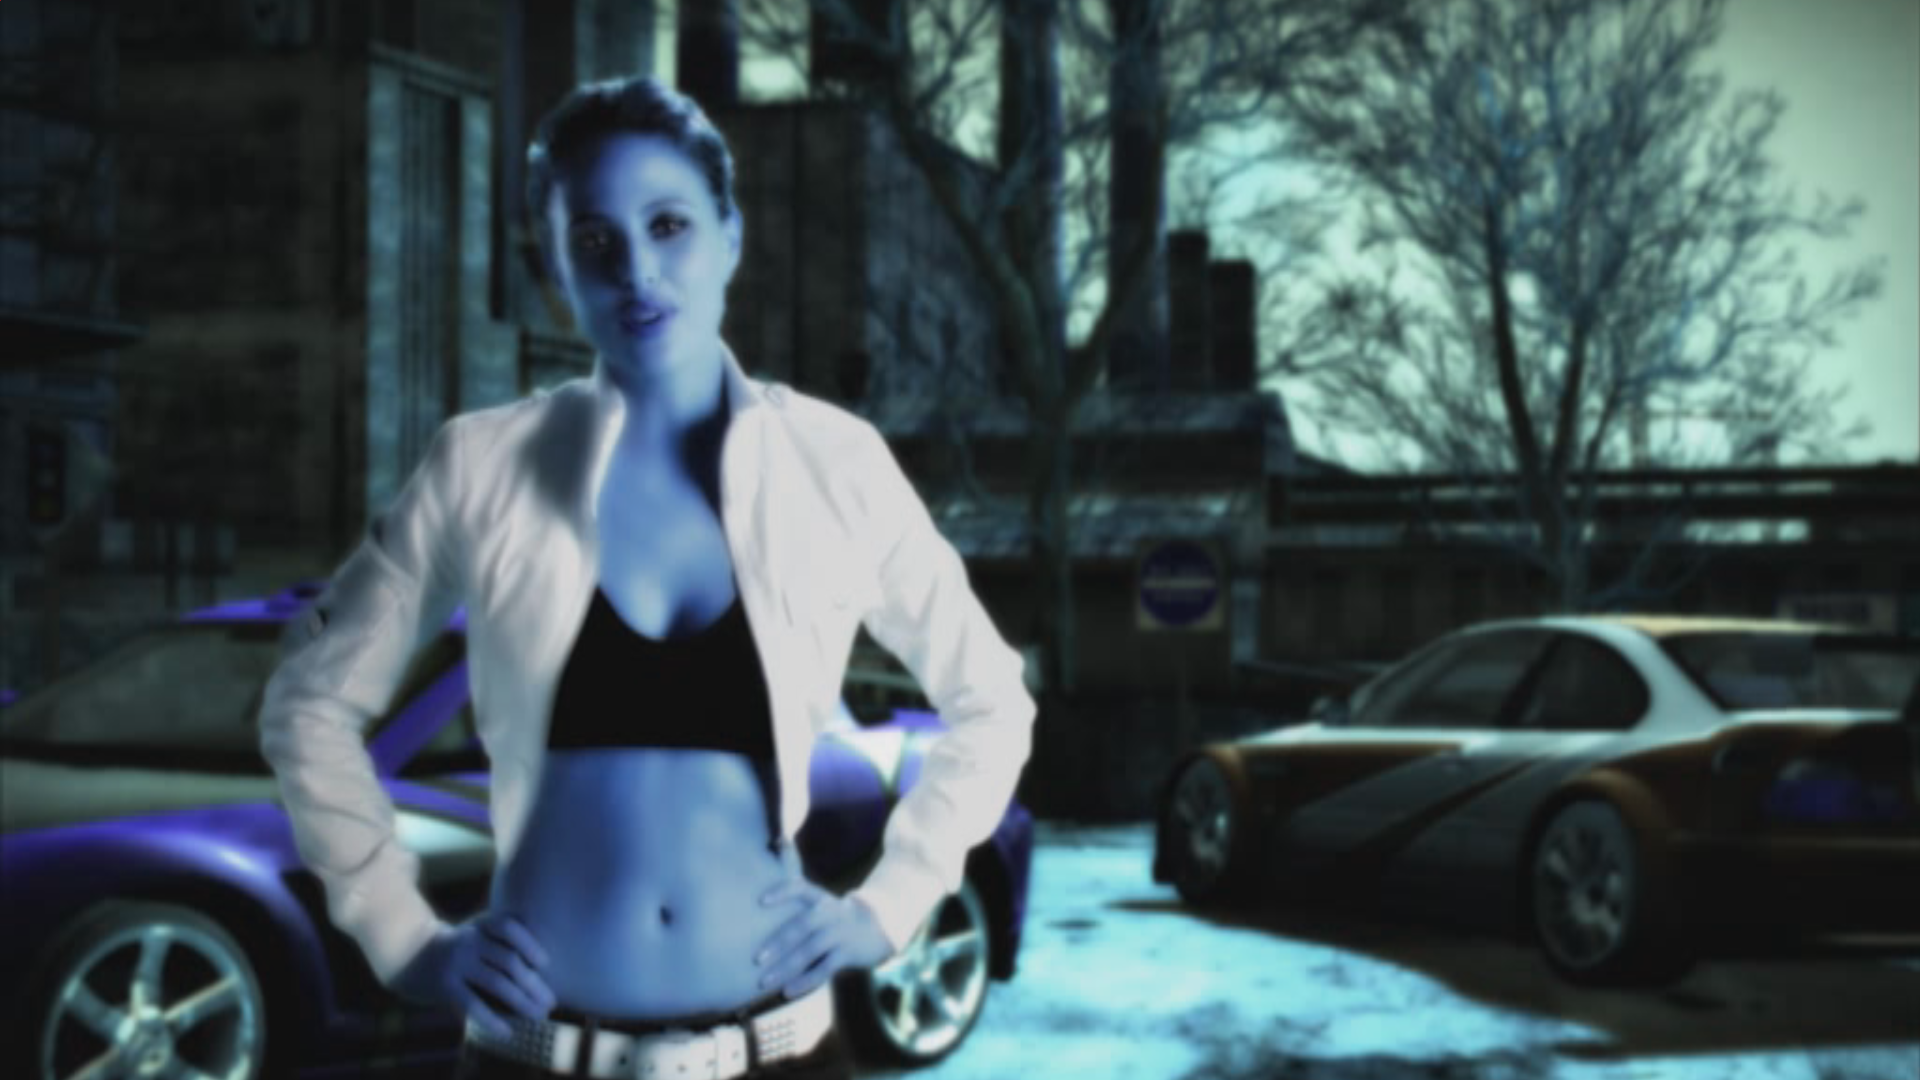

In [ ]:
from PIL import Image
import numpy as np


def load_data_with_pil(inverted_data, width, height):
    try:
        # flat_data = [channel for row in inverted_data for channel in row]  # List comprehension to flatten
        np_array = np.array(inverted_data, dtype=np.uint8)
        reshaped_array = np_array.reshape((height, width, 4))
        img = Image.fromarray(reshaped_array, "RGBA")  # Specify the mode as 'RGBA'
        return img
    except Exception as e:
        print(f"Error loading data with PIL: {e}")
        return None


load_data_with_pil(temp, 1920, 1080)

In [ ]:
7680 / 4

1920.0

In [47]:
import torch
from torchvision import transforms
import numpy as np
from PIL import Image

HEIGHT = 1440
WIDTH = 2560
image = torch.load(
    "F:\\project\\programming\\reshade\\examples\\01-framerate_limit_copy\\reshade_diffusion\\auto_remaster\\image.pt"
)
np_image = image.numpy()
np_image = image.numpy().reshape((HEIGHT, WIDTH, 4))
np_image[0:100, 10:100, :3] = 255 

In [ ]:
# np_image = image.numpy().reshape((4, HEIGHT, WIDTH))
# np_image[1:, 0:100, 10:100] = 255 

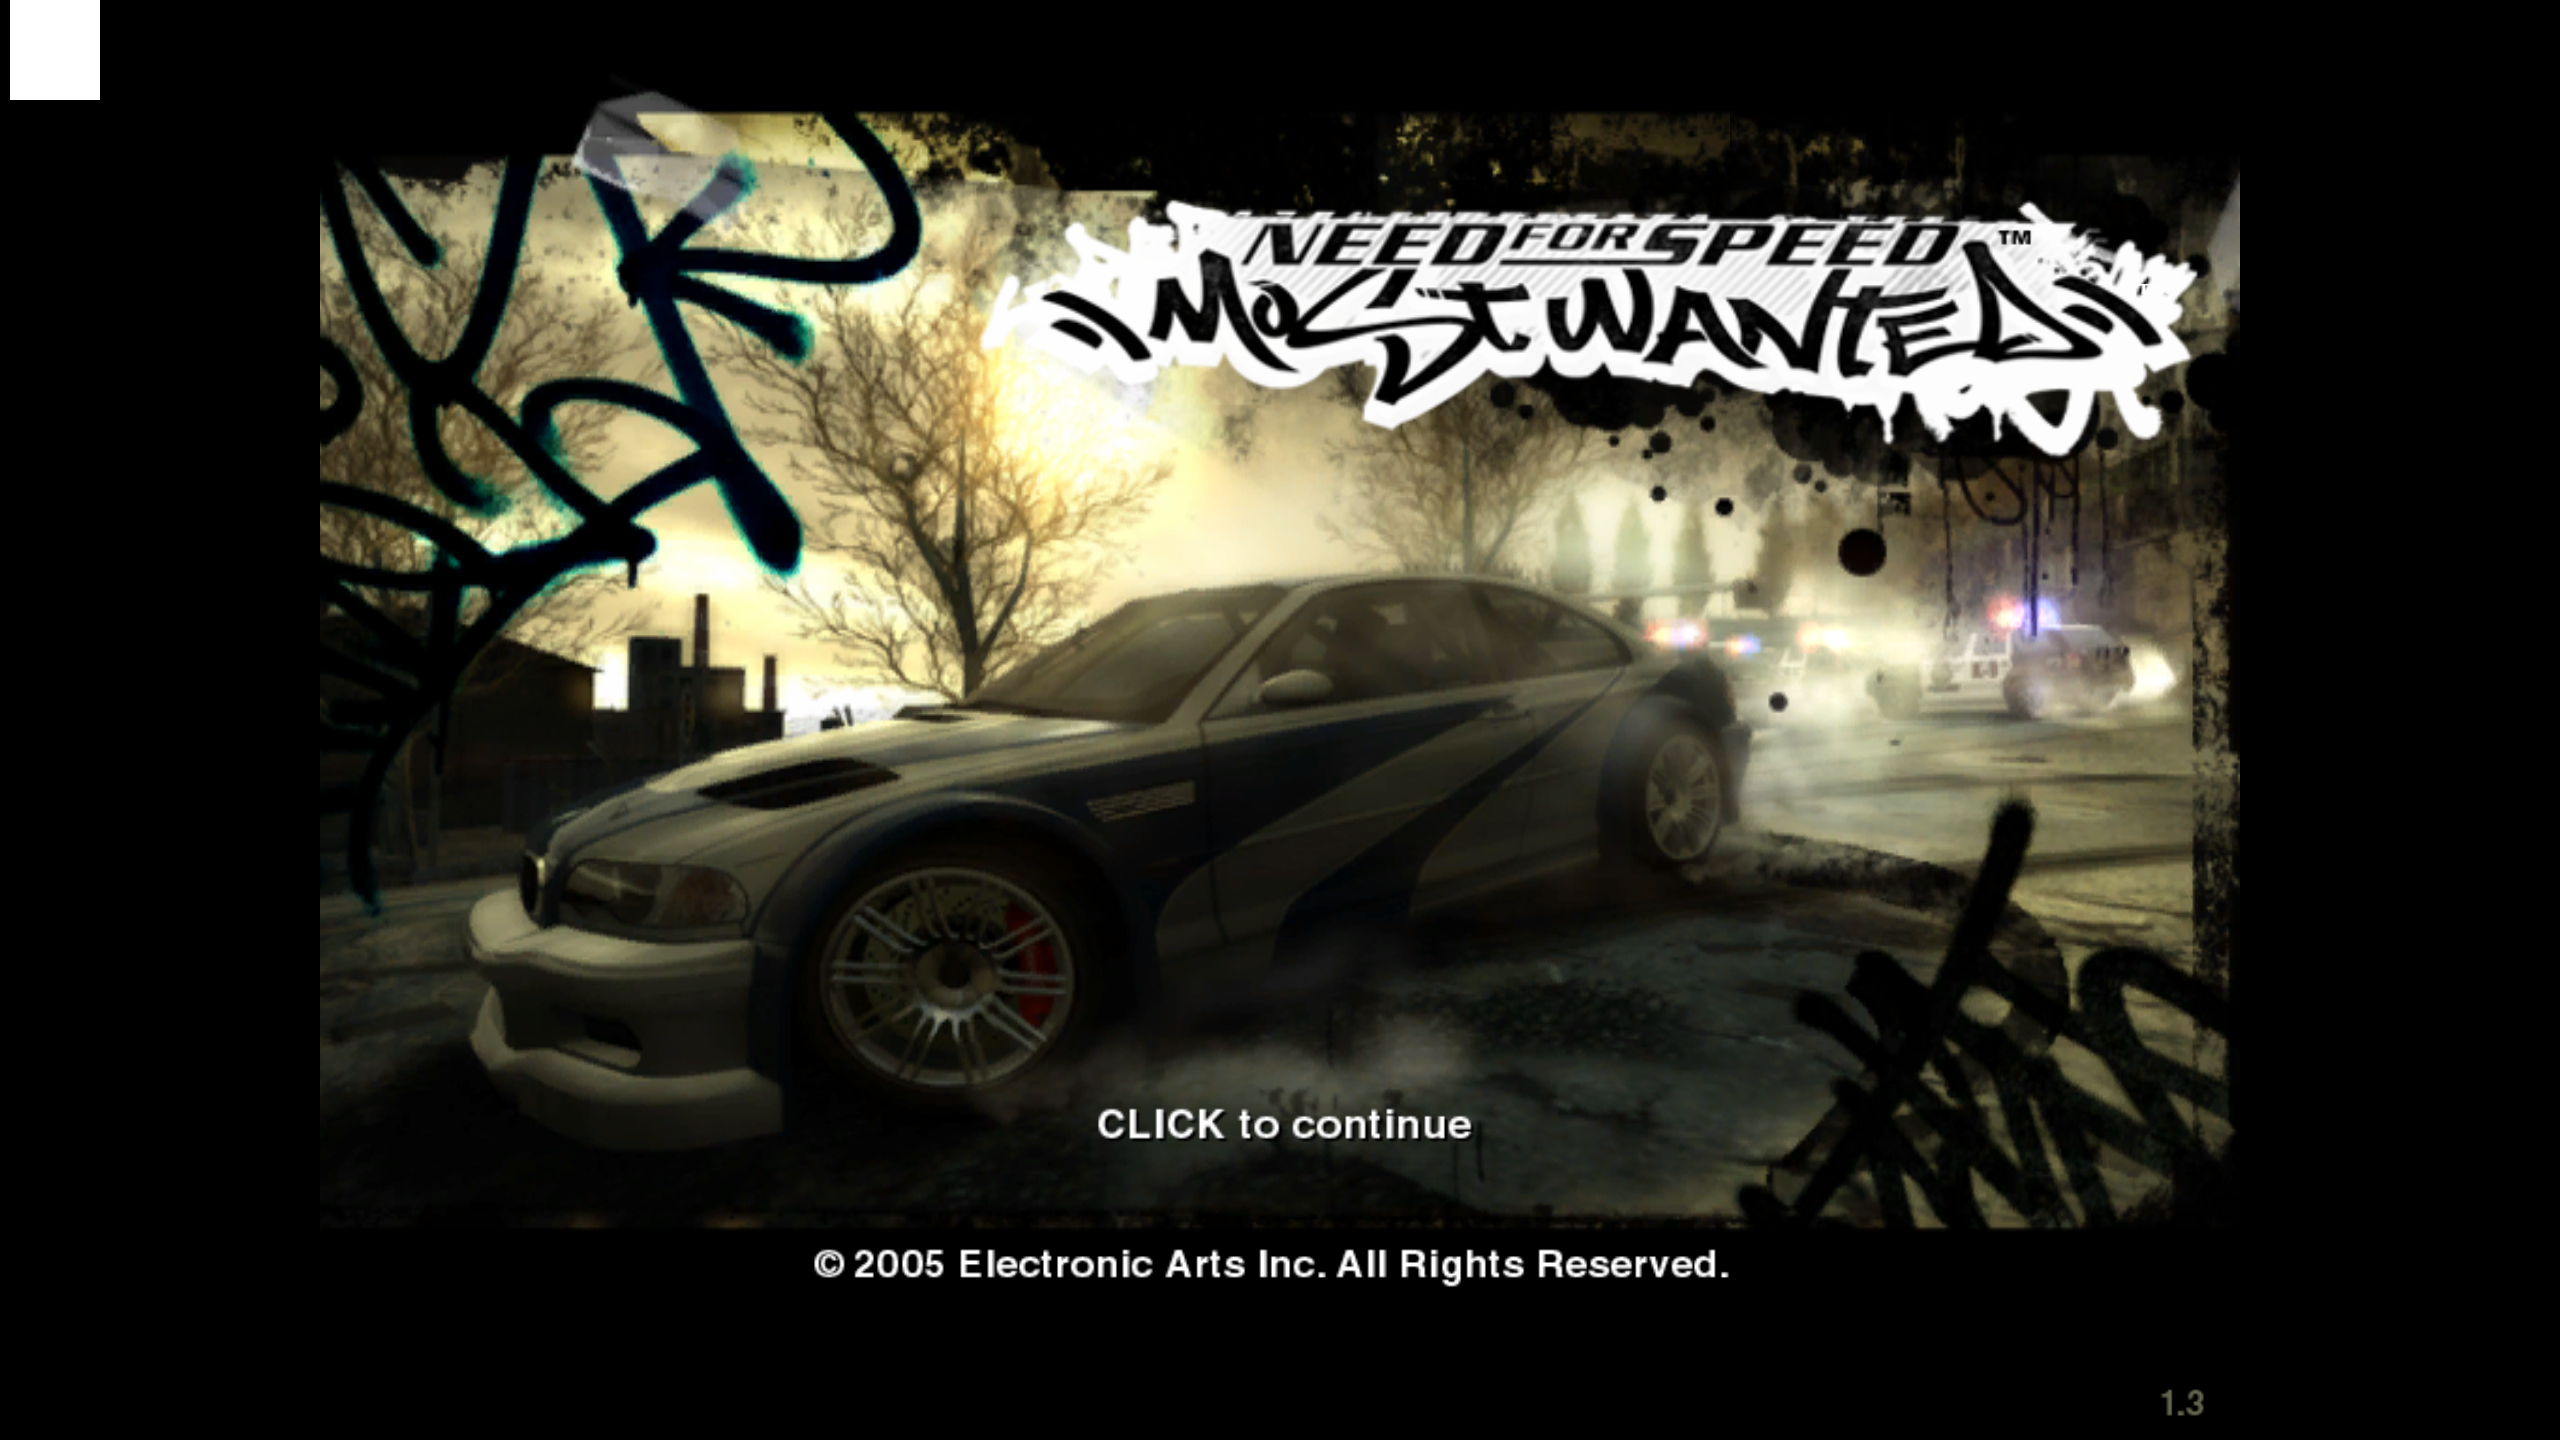

In [48]:
# transforms.ToPILImage()(image.reshape((HEIGHT, WIDTH, 4))[:, :, :3].numpy())

Image.fromarray(np_image.reshape((HEIGHT, WIDTH, 4))[:, :, [2, 1, 0]])
# Image.fromarray(np_image.reshape((4, HEIGHT, WIDTH ))[:3, :, :])
# Image.fromarray(np_image[:, :, [2, 1, 0]])

In [ ]:
np_image.reshape((4, HEIGHT, WIDTH)).shape

(4, 1440, 2560)